# Do tiers matter?#

by CPM

Jan 19, 2017

Using data from Kickstarter Project Statistics
https://www.kaggle.com/socathie/kickstarter-project-statistics

**I try to figure out the relation between tier structure and amount of pledged.** 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# live = pd.read_csv('input/live.csv',index_col=0)
back = pd.read_csv('input/most_backed.csv',index_col=0)

In [3]:
back.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Data columns (total 12 columns):
amt.pledged         4000 non-null float64
blurb               4000 non-null object
by                  4000 non-null object
category            4000 non-null object
currency            4000 non-null object
goal                4000 non-null float64
location            4000 non-null object
num.backers         4000 non-null int64
num.backers.tier    4000 non-null object
pledge.tier         4000 non-null object
title               4000 non-null object
url                 4000 non-null object
dtypes: float64(2), int64(1), object(9)
memory usage: 406.2+ KB


## Claen data ##

In [4]:
# Now I want to turn str to num format, but some data in "pledge.tier" contains "...", so I drop that.

t = []
for i,row in enumerate(back['pledge.tier']):
    if '...' in row:
        t.append(i)
print(t)

[714, 981, 1170, 1409, 3395, 3744]


In [5]:
back['pledge.tier'].iloc[981]

'[5.0, 7.0, 10.0, 15.0, 15.0, 15.0, 15.0, 18.0, 20.0, 20.0, 20.0, 25.0, 25.0, 25.0, 25.0, 30.0, 30.0, 35.0, 40.0, 45.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 55.0, 55.0, 65.0, 70.0, 70.0, 70.0, 70.0, 75.0, 75.0, 75.0, 75.0, 75.0, 75.0, 75.0, 75.0, 75.0, 80.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 125.0, 125.0, 130.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 180.0, 200.0, 200.0, 200.0, 250.0, 250.0, 250.0, 250.0, 250.0, 300.0, 300.0, 325.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 400.0, 400.0, 400.0, 400.0, 500.0, 500.0, 500.0, ...]'

In [6]:
back = back.drop(back.index[t])

In [7]:
# Convert str to float.
def num_tier(string):    
    return len(string[1:-1].split(', '))

def tier_num(string):
    l = []
    for s in string[1:-1].split(', '):
        l.append(float(s))
    return l

back['num of tier'] = back['pledge.tier'].apply(num_tier)
back['pledge.tier_num'] = back['pledge.tier'].apply(tier_num)
back['num.backers.tier_num'] = back['num.backers.tier'].apply(tier_num)

In [8]:
back = back[back['currency']=='usd']
back.reset_index(drop=True,inplace=True)

In [9]:
back_clean = back[['title','amt.pledged','category','goal','num.backers','num of tier',
                   'pledge.tier_num', 'num.backers.tier_num']]

In [10]:
back_clean.head()

,title,amt.pledged,category,goal,num.backers,num of tier,pledge.tier_num,num.backers.tier_num
0,Exploding Kittens,8782571.0,Tabletop Games,10000.0,219382,4,"[20.0, 35.0, 100.0, 500.0]","[15505.0, 202934.0, 200.0, 5.0]"
1,Fidget Cube: A Vinyl Desk Toy,6465690.0,Product Design,15000.0,154926,12,"[1.0, 14.0, 19.0, 19.0, 35.0, 35.0, 79.0, 79.0...","[788.0, 250.0, 43073.0, 21796.0, 41727.0, 2162..."
2,"Bring Reading Rainbow Back for Every Child, Ev...",5408916.0,Web,1000000.0,105857,64,"[5.0, 10.0, 25.0, 30.0, 35.0, 50.0, 75.0, 100....","[19639.0, 14343.0, 9136.0, 2259.0, 5666.0, 245..."
3,The Veronica Mars Movie Project,5702153.0,Narrative Film,2000000.0,91585,32,"[1.0, 10.0, 25.0, 35.0, 50.0, 75.0, 100.0, 150...","[5938.0, 8423.0, 11509.0, 22997.0, 23227.0, 18..."
4,Double Fine Adventure,3336371.0,Video Games,400000.0,87142,9,"[15.0, 30.0, 60.0, 100.0, 250.0, 500.0, 1000.0...","[47946.0, 24636.0, 1090.0, 11530.0, 900.0, 148..."


In [11]:
back_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3432 entries, 0 to 3431
Data columns (total 8 columns):
title                   3432 non-null object
amt.pledged             3432 non-null float64
category                3432 non-null object
goal                    3432 non-null float64
num.backers             3432 non-null int64
num of tier             3432 non-null int64
pledge.tier_num         3432 non-null object
num.backers.tier_num    3432 non-null object
dtypes: float64(2), int64(2), object(4)
memory usage: 214.6+ KB


## EDA ##

In [12]:
# I build the contribution in each tier in the every case.

tier_contrib = pd.Series()
for i in range(len(back_clean.index)):
    a = np.array(back_clean['pledge.tier_num'].iloc[i])
    b = np.array(back_clean['num.backers.tier_num'].iloc[i])
    contrib = pd.Series(list([a*b*100/np.sum(a*b)]))
    tier_contrib = tier_contrib.append(contrib)

In [13]:
tier_contrib.reset_index(drop=True,inplace=True)
tier_contrib.head()

0    [4.17065104387, 95.526738029, 0.268987490737, ...
1    [0.0134269814169, 0.0596376078163, 13.94475512...
2    [2.05450360916, 3.00094152108, 4.77874254629, ...
3    [0.109386899141, 1.55164340092, 5.3003276449, ...
4    [22.7184134796, 23.3467164929, 2.06591337695, ...
dtype: object

In [14]:
# "tier_contrib%" means the contribution in each tier.

back_clean['tier_contrib%'] = tier_contrib
back_clean.head()

C:\Users\Weizen\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,title,amt.pledged,category,goal,num.backers,num of tier,pledge.tier_num,num.backers.tier_num,tier_contrib%
0,Exploding Kittens,8782571.0,Tabletop Games,10000.0,219382,4,"[20.0, 35.0, 100.0, 500.0]","[15505.0, 202934.0, 200.0, 5.0]","[4.17065104387, 95.526738029, 0.268987490737, ..."
1,Fidget Cube: A Vinyl Desk Toy,6465690.0,Product Design,15000.0,154926,12,"[1.0, 14.0, 19.0, 19.0, 35.0, 35.0, 79.0, 79.0...","[788.0, 250.0, 43073.0, 21796.0, 41727.0, 2162...","[0.0134269814169, 0.0596376078163, 13.94475512..."
2,"Bring Reading Rainbow Back for Every Child, Ev...",5408916.0,Web,1000000.0,105857,64,"[5.0, 10.0, 25.0, 30.0, 35.0, 50.0, 75.0, 100....","[19639.0, 14343.0, 9136.0, 2259.0, 5666.0, 245...","[2.05450360916, 3.00094152108, 4.77874254629, ..."
3,The Veronica Mars Movie Project,5702153.0,Narrative Film,2000000.0,91585,32,"[1.0, 10.0, 25.0, 35.0, 50.0, 75.0, 100.0, 150...","[5938.0, 8423.0, 11509.0, 22997.0, 23227.0, 18...","[0.109386899141, 1.55164340092, 5.3003276449, ..."
4,Double Fine Adventure,3336371.0,Video Games,400000.0,87142,9,"[15.0, 30.0, 60.0, 100.0, 250.0, 500.0, 1000.0...","[47946.0, 24636.0, 1090.0, 11530.0, 900.0, 148...","[22.7184134796, 23.3467164929, 2.06591337695, ..."


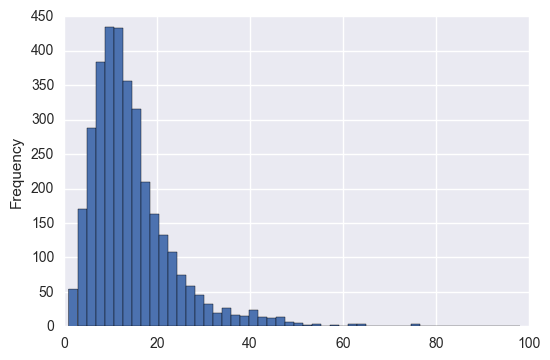

In [19]:
back_clean['num of tier'].plot.hist(bins=50)

In [15]:
# I build a new column to show which tier is the most contribution.
# (pledge.tier_num is in order.)

def argmax(tier):
    return tier.argmax()+1

back_clean['argmax_tier_contrib%'] = back_clean['tier_contrib%'].apply(argmax)
back_clean.head()

C:\Users\Weizen\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,title,amt.pledged,category,goal,num.backers,num of tier,pledge.tier_num,num.backers.tier_num,tier_contrib%,argmax_tier_contrib%
0,Exploding Kittens,8782571.0,Tabletop Games,10000.0,219382,4,"[20.0, 35.0, 100.0, 500.0]","[15505.0, 202934.0, 200.0, 5.0]","[4.17065104387, 95.526738029, 0.268987490737, ...",2
1,Fidget Cube: A Vinyl Desk Toy,6465690.0,Product Design,15000.0,154926,12,"[1.0, 14.0, 19.0, 19.0, 35.0, 35.0, 79.0, 79.0...","[788.0, 250.0, 43073.0, 21796.0, 41727.0, 2162...","[0.0134269814169, 0.0596376078163, 13.94475512...",5
2,"Bring Reading Rainbow Back for Every Child, Ev...",5408916.0,Web,1000000.0,105857,64,"[5.0, 10.0, 25.0, 30.0, 35.0, 50.0, 75.0, 100....","[19639.0, 14343.0, 9136.0, 2259.0, 5666.0, 245...","[2.05450360916, 3.00094152108, 4.77874254629, ...",6
3,The Veronica Mars Movie Project,5702153.0,Narrative Film,2000000.0,91585,32,"[1.0, 10.0, 25.0, 35.0, 50.0, 75.0, 100.0, 150...","[5938.0, 8423.0, 11509.0, 22997.0, 23227.0, 18...","[0.109386899141, 1.55164340092, 5.3003276449, ...",5
4,Double Fine Adventure,3336371.0,Video Games,400000.0,87142,9,"[15.0, 30.0, 60.0, 100.0, 250.0, 500.0, 1000.0...","[47946.0, 24636.0, 1090.0, 11530.0, 900.0, 148...","[22.7184134796, 23.3467164929, 2.06591337695, ...",4


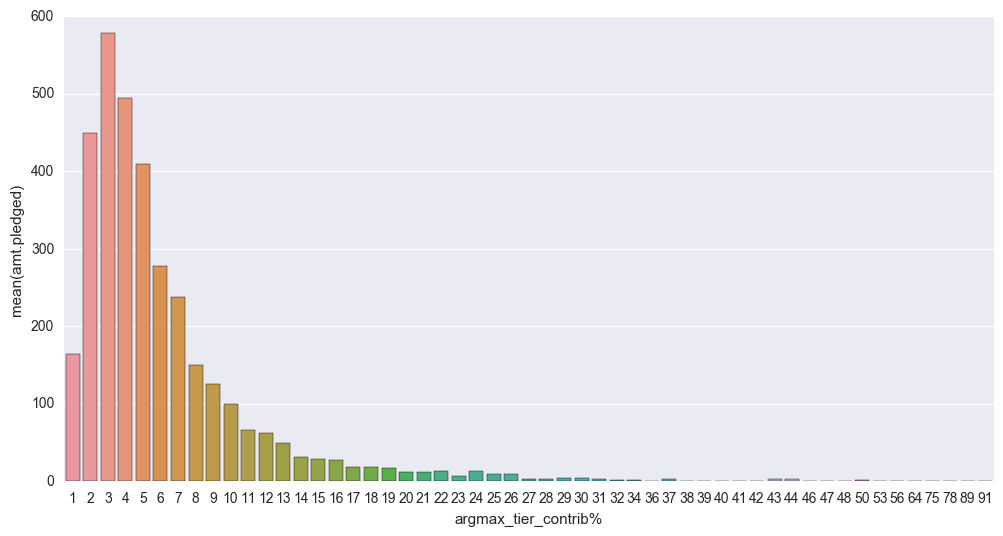

In [16]:
fig = plt.figure(figsize=(12,6))
sns.barplot(x=back_clean.groupby('argmax_tier_contrib%').count()['amt.pledged'].index,
            y=back_clean.groupby('argmax_tier_contrib%').count()['amt.pledged'])
#plt.xlim([0,10])

**I found that second to seventh price in "pledge.tier_num" is really important, they make a huge contribution to the funding cases.**

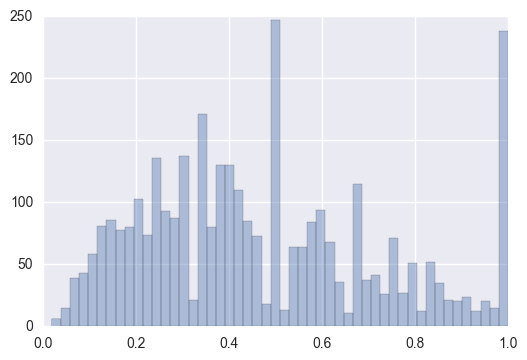

In [17]:
# max contribution by position in the whole pricing strategy

sns.distplot(back_clean['argmax_tier_contrib%']/back_clean['num of tier'],kde=False,bins=50)

**Apparently, the "median price" is very important. Many consumers or supporters maybe don't realize the value of that product, so they give the median price for that.**

**This figure shows that "1.0" is also important, because there's only one tier in some cases.**

In [18]:
# Now I use number scale to locate the position of the most contribution price. 

contrib_in_tier = pd.Series()
for i in range(len(back_clean.index)):
    diff = back_clean['pledge.tier_num'][i][-1]-back_clean['pledge.tier_num'][i][0]
    if diff != 0:
        temp = pd.Series((back_clean['pledge.tier_num'][i][back_clean['argmax_tier_contrib%'][i]-1]-back_clean['pledge.tier_num'][i][0])/diff)
    else:
        temp = pd.Series(1)
        
    contrib_in_tier = contrib_in_tier.append(temp*100)

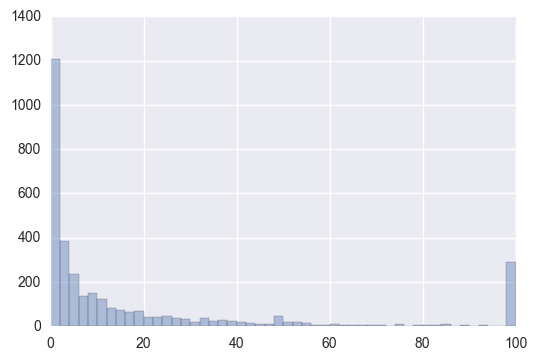

In [19]:
sns.distplot(contrib_in_tier,kde=False,bins=50)

## Conclusion
* These successful projects on Kickstarter have about 10 tiers is very popular.
* We found that second to seventh price in "pledge.tier_num" is really important, they make a huge contribution to the funding cases.
* The "median price" in the project is very important.
* The contribution of crowd maybe meets the "long tail theory", so the big part of contribution is at the lower price.